# Detección de texturas

## Autor: Ronie Martínez Gordon

#### Trabajo presentado como actividad propuesta para la asignatura "Percepción Computacional"

## Objetivo

El objetivo de esta actividad es profundizar en la detección de texturas y en el uso de descriptores basados en entropía.

## Descripción

Aunque existen numerosos tipos de descriptores de textura, en esta actividad nos centraremos únicamente en el uso de la **entropía localizada**, es decir, usando regiones de 3x3 y 5x5 píxeles y estudiaremos cómo de viable es esta técnica para la detección de texturas.

Deberás hacer uso de la imagen que se facilita. En ella se aprecian diferentes tipos de texturas (circulares y trapezoidales). Deberás distinguir de forma automática y con algoritmos basados en entropía y en procesamiento de imágenes el mayor número posible de texturas. Para ello, se aconseja que sigan las siguientes tareas:

- Implementar una función de entropía para imágenes, tal y como se ha descrito en la teoría.
- Calcular esa entropía para conjuntos de píxeles de tamaño variable, comenzando por los de 3x3 píxeles. 
- Se repetirá el ejercicio para tamaños de 5x5 y 7x7.
- Por último, se representará el resultado obtenido para cada tipo de conjunto y se ha de indicar una evaluación sobre si la entropía ayuda o facilita la extracción de características.

## Desarrollo
### Importamos las librerías necesarias

In [1]:
# Librerías
import numpy as np
from skimage import io#, color, feature
import math

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

### Cargamos la imagen propuesta para el procesmiento

Por las caraterísticas propias de la imagen se decidió trabajarla en modo escala de grises.

Dimensión de la imagen:  (512, 512)


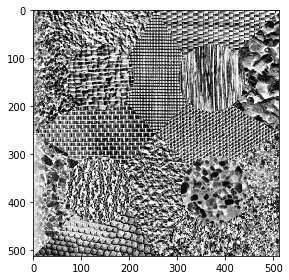

In [2]:
# Cargamos la imagen
nombre = 'tema5_actividad.png'
img = io.imread(nombre, as_gray=True)
# La imagen se guarda con valores normalizados (0 - 1)
print("Dimensión de la imagen: ",img.shape)
# Mostramos la imagen
io.imshow(img)
io.show()

### Implementar una función de entropía para imágenes, tal y como se ha descrito en la teoría.

Implementamos la función de la entropía, dada por la ecuación:

$H(x) = - \Sigma_{i=0}^{N_g-1}(P(i)*lnP(i))$

donde: 

$P(i)$: es la probabilidad de cada valor de píxel

$N_g$: es el número de distintos niveles de gris en la imagen

In [3]:
# Función entropía
def entropia(ventana):
    # Arreglo 1D de la ventana 2D
    vector = ventana.ravel()
    # Número de elementos de la ventana
    tamaño = len(vector)
    # Histograma
    hist, bin_edges = np.histogram(vector, tamaño)
    # Probabilidades
    probs = hist/tamaño
    probs = [el for el in probs if el !=0]
    ent = 0
    # Ecuación de la entropía
    for i in probs:
        #log logaritmo natural - ln
        ent = ent - (i*math.log(i))        
    return ent

# Función del barrido recorriendo la imagen
def barrido(image, wz):
    # wz: "window size" debe ser impar
    ws = int(wz/2) # "window side"
    rows = image.shape[0]
    cols = image.shape[1]
    # Para los bordes (que no contienen la ventana completa)
    # se define un valor de 0
    entropy_img = np.zeros(image.shape)
    # Barrido de la ventana por la imagen
    for r in range (ws, rows - ws):
        for c in range (ws, cols - ws):
            # Obtención de la ventana
            y = image[r-ws:r+ws+1, c-ws:c+ws+1]
            # Aplicación de la fórmula de entropía
            entropy_img[r,c] = entropia(y)
    return entropy_img

### Calcular esa entropía para conjuntos de píxeles de tamaño variable, comenzando por los de 3x3 píxeles.

In [4]:
# Copia de la imagen original
img_c = img.copy()

# Ejecución del algoritmo para una ventana de 3x3
img_w3 = barrido(img_c, 3)

### Se repetirá el ejercicio para tamaños de 5x5 y 7x7.

In [5]:
# Ejecución del algoritmo para una ventana de 5x5
img_w5 = barrido(img_c, 5)

# Ejecución del algoritmo para una ventana de 7x7
img_w7 = barrido(img_c, 7)

### Por último, se representará el resultado obtenido para cada tipo de conjunto y se ha de indicar una evaluación sobre si la entropía ayuda o facilita la extracción de características.

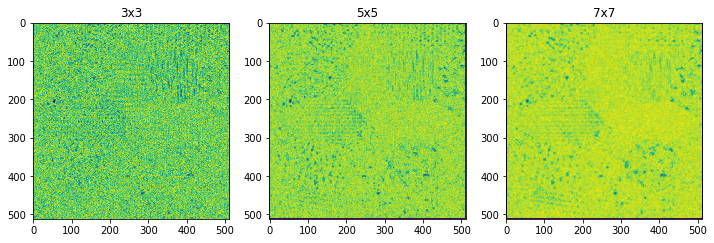

In [6]:
f, (ax0,ax1, ax2) = plt.subplots(1,3, figsize=(10, 5))
ax0.imshow(img_w3)# cmap='gray' para escala de grises
ax0.set_title("3x3")
ax1.imshow(img_w5)# cmap='gray' para escala de grises
ax1.set_title("5x5")
ax2.imshow(img_w7)# cmap='gray' para escala de grises
ax2.set_title("7x7")
plt.tight_layout()
plt.show()

#### Adicionalmente se presentan los resultados con una función en una librería ya existente

In [7]:
# Librerías necesarias
from skimage.filters.rank import entropy
from skimage.morphology import square, disk

Función _entropy_ con ventana tipo _disk_

C:\Users\rsmartinez\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


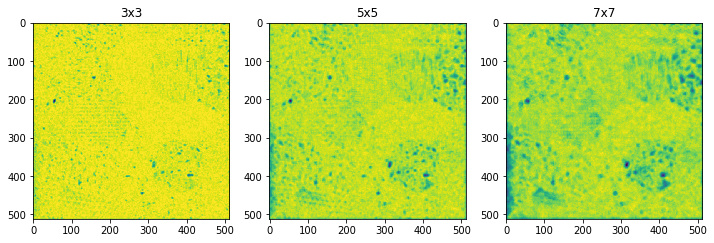

In [8]:
# disk es para una ventana circular
img_w3=entropy(img_c, disk(3))
img_w5=entropy(img_c, disk(5))
img_w7=entropy(img_c, disk(7))

f, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(10, 5))
ax0.imshow(img_w3)# cmap='gray' para escala de grises
ax0.set_title("3x3")
ax1.imshow(img_w5)# cmap='gray' para escala de grises
ax1.set_title("5x5")
ax2.imshow(img_w7)# cmap='gray' para escala de grises
ax2.set_title("7x7")
plt.tight_layout()
plt.show()

Función _entropy_ con ventana tipo _square_

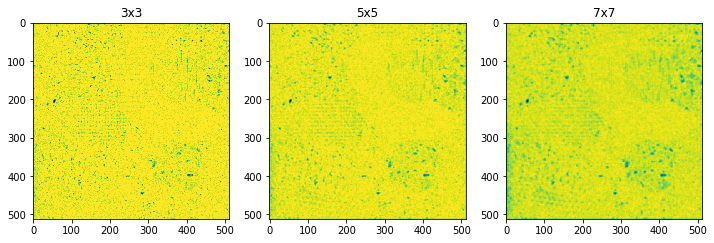

In [9]:
# square es para una ventana cuadrada
img_w3=entropy(img_c, square(3))
img_w5=entropy(img_c, square(5))
img_w7=entropy(img_c, square(7))

f, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(10, 5))
ax0.imshow(img_w3)# cmap='gray' para escala de grises
ax0.set_title("3x3")
ax1.imshow(img_w5)# cmap='gray' para escala de grises
ax1.set_title("5x5")
ax2.imshow(img_w7)# cmap='gray' para escala de grises
ax2.set_title("7x7")
plt.tight_layout()
plt.show()

Si bien, la función implementada por mi cuenta no es "lenta", la función de la librería es mucho más óptima y rápida, arrojando resultados muy similares a los obtenidos anteriormente, evidenciando que el proceso seguido es el correcto.

### Comentarios

El tamaño, e inclusive la forma de la ventana, deben ajustarse de acuerdo a las necesidades y al tipo de imagen a tratar. Por ejemplo, en este caso, parece resultar más útil la ventana de 7x7 en comparación con las otras dos (3x3 y 5x5), ya que además de remarcar ligeramente los patrones circulares, también lo intenta con los trapezoidales del centro, aunque en ninguno de los casos, lo hace de manera completa y acertada. **Observación**: es posible también que debido a la plasticidad de nuestro cerebro, empezemos a interpretar o tratar de encontrar figuras y patrones en donde realmente no las hay, o también debido a que conocemos previamente la imagen original y tratemos de darle sentido o razón y hacer una analogía con lo ya conocido.

La entropía toma valores bajos cuando no hay mucha variabilidad, por ejemplo, si hay patrones. Por el contrario, tiene valores altos cuando hay mayor variabilidad. Si se realiza un histograma, un histograma con picos marcados representa textura o patrón, mientras que un histograma más "uniforme" o "plano" representa la ausencia de patrones. A continuación se presenta una demostración de la teoría, en donde las figuras después del proceso de estimación de entropía presentan histogramas con picos marcados.

Original

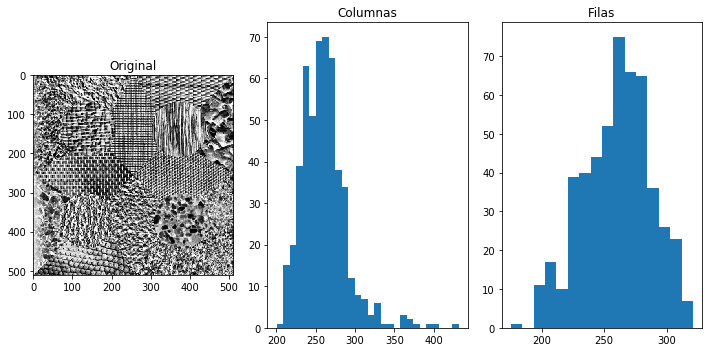

In [10]:
rs = np.sum(img_c,axis=1) #rows
cs = np.sum(img_c,axis=0) #cols

f, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(10, 5))
ax0.imshow(img_c, cmap='gray')
ax0.set_title("Original")
ax1.hist(cs, bins='fd')
ax1.set_title("Columnas")
ax2.hist(rs, bins='fd')
ax2.set_title("Filas")
plt.tight_layout()
plt.show()

Entropía con ventana 3x3

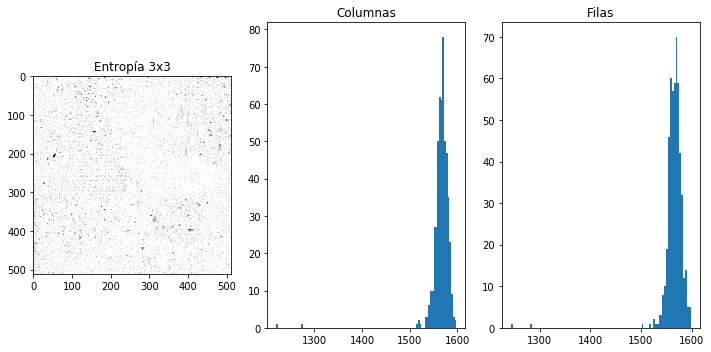

In [11]:
rs = np.sum(img_w3,axis=1) #rows
cs = np.sum(img_w3,axis=0) #cols

f, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(10, 5))
ax0.imshow(img_w3, cmap='gray')
ax0.set_title("Entropía 3x3")
ax1.hist(cs, bins='fd')
ax1.set_title("Columnas")
ax2.hist(rs, bins='fd')
ax2.set_title("Filas")
plt.tight_layout()
plt.show()

Entropía con ventana 5x5

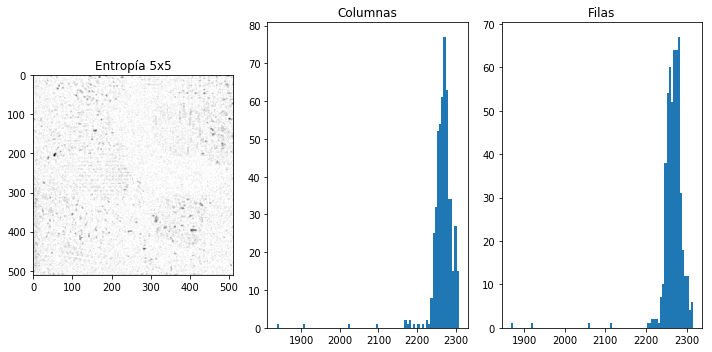

In [12]:
rs = np.sum(img_w5,axis=1) #rows
cs = np.sum(img_w5,axis=0) #cols

f, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(10, 5))
ax0.imshow(img_w5, cmap='gray')
ax0.set_title("Entropía 5x5")
ax1.hist(cs, bins='fd')
ax1.set_title("Columnas")
ax2.hist(rs, bins='fd')
ax2.set_title("Filas")
plt.tight_layout()
plt.show()

Entropía con ventana 7x7

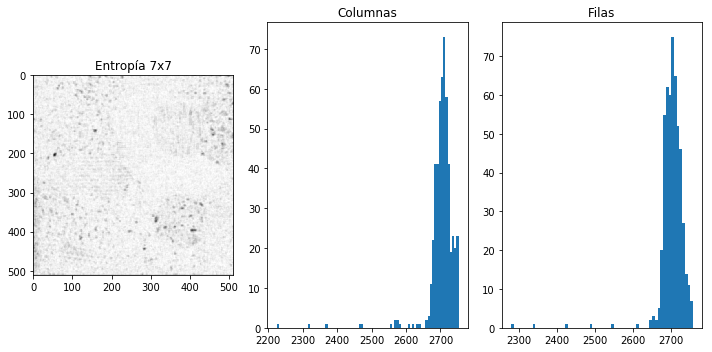

In [13]:
rs = np.sum(img_w7,axis=1) #rows
cs = np.sum(img_w7,axis=0) #cols

f, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(10, 5))
ax0.imshow(img_w7, cmap='gray')
ax0.set_title("Entropía 7x7")
ax1.hist(cs, bins='fd')
ax1.set_title("Columnas")
ax2.hist(rs, bins='fd')
ax2.set_title("Filas")
plt.tight_layout()
plt.show()

La utilización de la entropía localizada por si sola, y para este caso, no ayuda mucho para la extracción de características. Es decir, debería ir acompañada de otros procesos (ej. filtro paso bajo previo para el suavizado, filtro paso alto para el afilado de los bordes, etc.).

http://scipy-lectures.org/advanced/image_processing/

### Ejemplos de filtros

A continuación presento dos filtros interesantes para detección de bordes.

https://scikit-image.org/docs/dev/api/skimage.filters.html

**Sobel**.- Hace uso de un kernel convolucional de 3x3. Utilizado en detección de bordes.

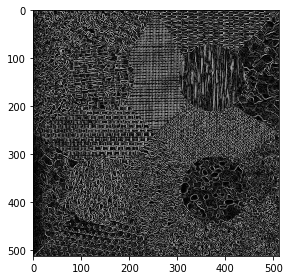

In [14]:
from skimage import filters
edges = filters.sobel(img_c)
io.imshow(edges)
io.show()

**Gabor**.- Filtro lineal con un kernel Gaussiano. Utilizado en detección de bordes y clasificación de texturas.

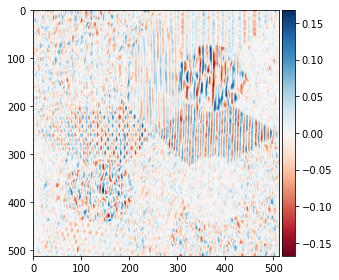

In [15]:
filt_real, filt_imag = filters.gabor(img_c, frequency=0.2)
io.imshow(filt_real)
io.show()

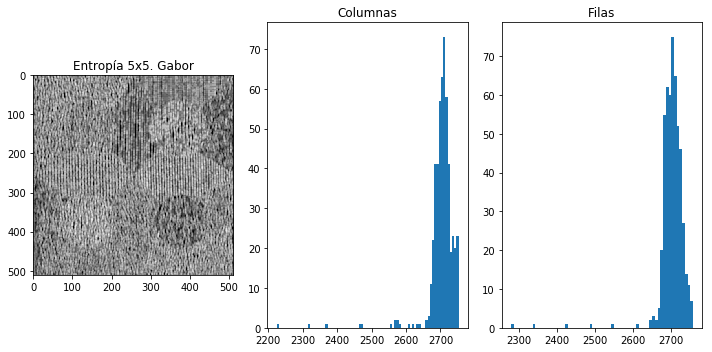

In [16]:
img_gabor=entropy(filt_real, square(5))
f, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(10, 5))
ax0.imshow(img_gabor, cmap='gray')
ax0.set_title("Entropía 5x5. Gabor")
ax1.hist(cs, bins='fd')
ax1.set_title("Columnas")
ax2.hist(rs, bins='fd')
ax2.set_title("Filas")
plt.tight_layout()
plt.show()